# **Práctica 2 - Perfil de los clientes de un banco**


## Objetivo 
La sucursal del Banco Santander situada en el campus de la Universidad Francisco de Vitoria nos solicita hacer varios estudios de sus clientes. Para ello haremos uso de un dataset proporcionado por la propia sucursal que 
se puede encontrar en Moodle. 



## Apartado 1

Para preparar los datos vamos a crear un DataFrame que luego guardaremos en un csv donde se almacenará sólo la información necesaria. Esta es: 

*   Age (edad)
*   Education (nivel de estudios)
*   Balance (saldo)
*   Duration (días como cliente)


In [ ]:
import pandas as pd
datos = pd.read_csv('banco_ufv.csv', sep=';')

In [ ]:
datos1 = datos[['age', 'education', 'balance', 'duration']]
datos.to_csv('datos1.csv', index=False)

En la siguiente linea comprobamos la existencia de NaN's en nuestro data frame, 'False' indica que no hay por lo que nos ahorramos el paso de eliminarlos.

In [ ]:
datos1.isna().any().any()

False

### Explica si el nivel de estudios está directamente relacionado con el saldo de cada cliente en la cuenta. 



Para ello estableceremos 3 rangos numéricos: 
*   Los que tienen deudas
*   La gente que tiene unos ahorros normales (en positivo, pero menos de 10.000 euros) 
*  Los que disponen de suficientes ahorros como para ofrecerles paquetes de inversión (aquellos en positivo con más de 10.000 euros). 

Primero agregamos una columna para clasificar el saldo de cada cliente.


In [ ]:
import numpy as np
datos1["saldo"] = np.where(datos1["balance"] < 0, "Deuda",
                  np.where(datos1["balance"] < 10000, "Normal", "Suficiente"))
datos1



age  education  balance  duration   saldo
0       58   tertiary     2143       261  Normal
1       44  secondary       29       151  Normal
2       33  secondary        2        76  Normal
3       47    unknown     1506        92  Normal
4       33    unknown        1       198  Normal
...    ...        ...      ...       ...     ...
45206   51   tertiary      825       977  Normal
45207   71    primary     1729       456  Normal
45208   72  secondary     5715      1127  Normal
45209   57  secondary      668       508  Normal
45210   37  secondary     2971       361  Normal

[45211 rows x 5 columns]

Seguidamente graficamos los datos para poder explicar de la mejor forma posible si los estudios están directamente relacionados con el saldo de cada cliente en la cuenta. 

Empezamos graficando un 'countplot' para así ver si podemos sacar conclusiones sobre la relación.

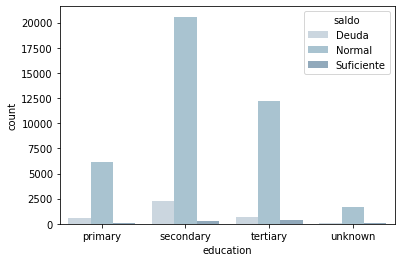

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

#Defino los colores
blues = ['#c8d6e2','#a2c5d6', '#8aaac2']

#Defino el orden en el eje de x y el orden de las categorías en la columna saldo
orden1 = ["primary", "secondary", "tertiary", "unknown"]
orden2 = ['Deuda', 'Normal', 'Suficiente']


#Graficamos
sns.countplot(x="education", hue="saldo", data=datos1, palette=blues, order=orden1, hue_order=orden2)
plt.show()


El gráfico muestra, para cada tipo de educación, la cantidad de personas en deuda, con saldo normal y suficiente.

Viendo este gráfico, podríamos concluir que no hay ninguna relación entre las dos variables por dos razones:

*  Hay más gente en **deuda** con estudios secundarios que gente en deuda con solo estudios primarios.
*  Número similar de gente con saldo **suficiente** en ambos grupos "terciario" y "secundario".

Sin embargo, observando la gráfica, hemos percibido que el número de gente en cada grupo no es homogéneo, por lo que la gráfica no es fiable para determinar la relación entre ambas variables. 

Es decir, al haber muchas más personas con estudios secundarios en el data frame, es normal que haya más endeudados.

Por ello, procedemos a estudiar el porcentaje de personas que estan en deuda, tienen saldo suficiente y normal, para cada nivel de estudios. 

También concluimos que para este apartado no aportan nada los "unknown" por lo que creamos otro dataframe sin ellos.


In [ ]:
datos2 = datos1[datos1.education != "unknown"]

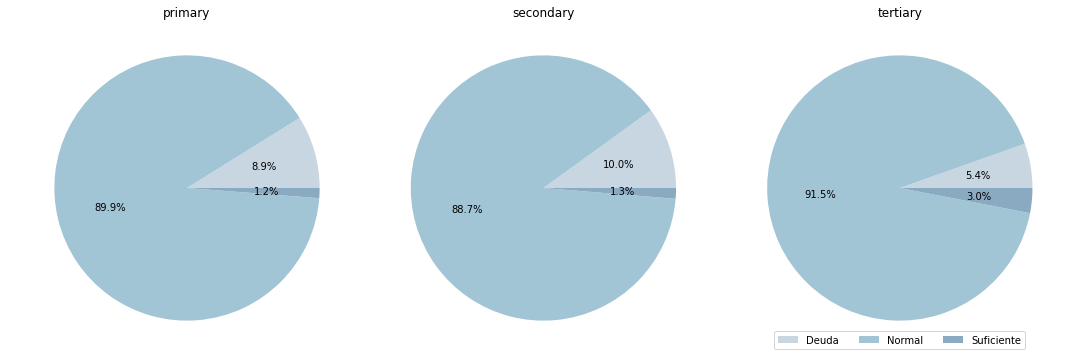

In [ ]:
#Graficamos las tres en un mismo marco de dibujo de tres columnas y una fila
fig, axs = plt.subplots(1,3, figsize=(15, 10))

#Agrupamos los datos
grouped = datos2.groupby(['education', 'saldo']).size().reset_index(name=' ')

#Graficamos
for i, (educacion, datos2_educacion) in enumerate(grouped.groupby("education")):
    datos2_educacion = datos2_educacion.set_index("saldo")
    datos2_educacion[" "].plot.pie(autopct='%1.1f%%', ax=axs[i], labels=None, colors=blues)
    axs[i].set_title(f"{educacion}")

plt.tight_layout()
plt.legend(['Deuda', 'Normal','Suficiente'], loc='lower center', ncol=3)
plt.tight_layout()
plt.show()

Elegimos hacer tres pie charts. Cada una muestra el porcentaje de personas con un saldo suficiente, normal y en deuda para cada nivel de educación.

Al observar las gráficas nos damos cuenta de que no hay gran diferencia entre las personas que terminan sus estudios tras acabar la primaria y las que llegan a cursar hasta secundaria. Ambos grupos tienen aproximadamente el mismo número de personas, en proporción, con un saldo suficiente, es decir, con un saldo mayor a 10,000€. La cifra exacta seria que un 1.2% personas con estudios primarios tienen un saldo mayor a 10.000€ en su cuenta y para los que tienen estudios secundarios el porcentaje aumenta tan solo en un 0.1%.

Si seguimos observando estos dos grupos, podemos notar que el nivel de estudios no esta relacionado con el saldo ya que el porcentaje de deuda es mayor para las personas con estudios de secundaria (10.0%) que para los que completaron tan solo hasta primaria (8.9%).

Sin embargo, si que parece haber una diferencia un poco más notable si contrastamos primaria y secundaria con estudios terciaros. Según los datos, dentro del grupo de personas con estudios terciarios, hay más del doble con saldo suficiente que en los otros grupos, pocos más con un saldo normal y casi la mitad de clientes endeudados (5.4%). Es sin ninguna duda el grupo que más destaca.

En conclusión, el nivel de estudios no está directamente relacionado con el saldo de los clientes con estudios primarios y secundarios, pero si puede llegar a estar relacionado con aquellos clientes que han realizado estudios terciarios.

##Apartado 2

Otro dato interesante sería conocer cuál ha sido el grupo de edad que tiene más clientes. Así sabremos  si  los alumnos usan la  cuenta creada  a través de la  Universidad o no.  Para  ello haz una transformación  donde  los  alumnos  se  considerarán  personas  de  menos  de  30  años.  Trabajadores  jóvenes serán  personas  de  30  a 45  años,  de  46  a 65  años  serán  trabajadores  veteranos y  el  resto  serán  clientes  no vinculados a la Universidad. Obten un gráfico donde podamos ver como se distribuye cada clase. Interpreta los datos. 

<ipython-input-91-aad455db7551>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos2['categoria_edad'] = datos2['age'].apply(categorize_age)


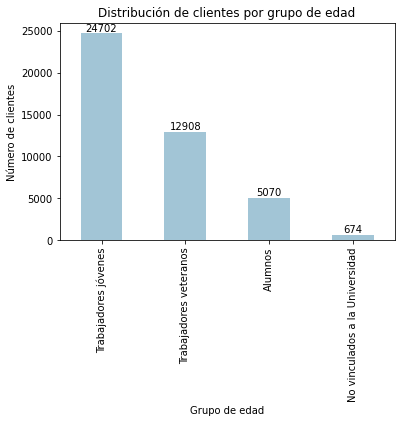

In [ ]:
#Separar los datos
def categorize_age(age):
    if age < 30:
        return 'Alumnos'
    elif age < 46:
        return 'Trabajadores jóvenes'
    elif age < 66:
        return 'Trabajadores veteranos'
    else:
        return 'No vinculados a la Universidad'

#Agregar una columna de categorías de edad
datos2['categoria_edad'] = datos2['age'].apply(categorize_age)  

#Contar el número de clientes en cada grupo de edad
counts = datos2['categoria_edad'].value_counts()  

#Crear un gráfico de barras
counts.plot(kind='bar', color='#a2c5d6') 
plt.title('Distribución de clientes por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Número de clientes')
for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

INTERPRETACIÓN DE LOS DATOS AQUI

##Apartado 3
Por último queremos saber cómo se distribuyen y cuáles son las frecuencias respecto a los días que el cliente lleva en la empresa. Transforma los datos de manera que pasemos de días a años (tendremos decimales) y busca la representación más útil (sólo una). ¿Qué nos dicen los datos? 

<ipython-input-94-307561986122>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos2['antiguedad'] = datos2['duration'] / 365


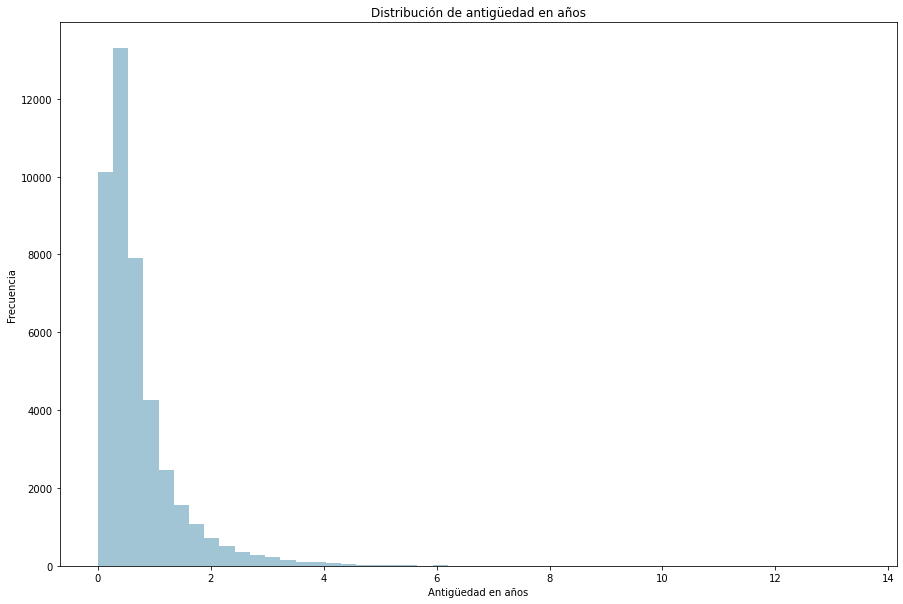

In [ ]:
#Agregamos una columna de antigüedad en años
datos2['antiguedad'] = datos2['duration'] / 365  

#Creamos un histograma de antigüedad en años
datos2['antiguedad'].plot.hist(bins=50, figsize=(15, 10), color='#a2c5d6') 

plt.title('Distribución de antigüedad en años')
plt.xlabel('Antigüedad en años')
plt.ylabel('Frecuencia')

plt.show()

INTERPRETACIÓN DE LOS DATOS AQUI (¿QUE NOS DICEN LOS DATOS?)